# E-Commerce Data Analytics Project with Python and SQL

## Project Summary
This notebook showcases a comprehensive data analytics workflow for an e-commerce dataset using Python and SQL. It covers data extraction, cleaning, exploratory data analysis (EDA), and visualization to derive actionable insights into customer behavior and sales trends.

## Key Steps

1. **Data Extraction and Cleaning:**
   - Loaded e-commerce dataset into a MySQL database.
   - Cleaned and transformed data using SQL and pandas in Python.

2. **Exploratory Data Analysis (EDA):**
   - Conducted EDA to understand data distributions, correlations, and key metrics.
   - Generated visualizations to uncover patterns and trends.

3. **Customer Segmentation:**
   - Performed RFM (Recency, Frequency, Monetary) analysis to segment customers.
   - Analyzed customer purchase behavior to identify key segments.

4. **Sales Analysis:**
   - Analyzed sales performance across various dimensions (e.g., time, product categories).
   - Identified top-selling products and seasonal trends.

5. **Customer Retention Analysis:**
   - Calculated customer retention rates and investigated factors affecting loyalty.

6. **Predictive Analytics:**
   - Built and evaluated predictive models to forecast future sales and customer behavior.

## Tools and Technologies

- **Python:** pandas, Matplotlib, Seaborn, Scikit-learn
- **SQL:** MySQL Workbench for data management and complex queries
- **Jupyter Notebook:** Documentation and analysis

## Results and Insights

- Visualizations of sales trends and customer distribution.
- Analysis of top-selling product categories and their contribution to total sales.
- Customer retention and predictive models for future sales forecasting.

## Conclusion

This project demonstrates a full-cycle data analytics process from data cleaning to predictive modeling, providing valuable insights into e-commerce operations and customer behavior.

In [1]:
import pandas as pd
import mysql.connector
import os
import numpy as np

In [2]:
# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')  # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='1234',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/admin/Desktop/PROJECTS/Youtube Projects/Data Analysis using Python/Target (E-Commerce) Data Analytics Project with Python and SQL'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host ="localhost",
                             username ="root",
                             password ="1234",
                             database ="ecommerce")
cur = db.cursor()

## Basic Queries
1. List all unique cities where customers are located.
2. Count the number of orders placed in 2017.
3. Find the total sales per category.
4. Calculate the percentage of orders that were paid in installments.
5. Count the number of customers from each state. 

### 1. List all unique cities where customers are located.

In [4]:
query = """ SELECT distinct (customer_city)
            FROM customers """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head(5)

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


### Count the number of orders placed in 2017.

In [5]:
query = """ SELECT COUNT(order_id)
            FROM orders
            WHERE year(order_purchase_timestamp)= 2017"""

cur.execute(query)

data = cur.fetchall()

"Total orders placed in 2017 are: ", data[0][0]

('Total orders placed in 2017 are: ', 225505)

### Find the total sales per category.

In [6]:
query = """ SELECT upper(products.product_category) category, 
            round(sum(payments.payment_value),2) sales
            FROM products join order_items
            on products.product_id = order_items.product_id
            join payments
            on payments.order_id = order_items.order_id
            GROUP BY category
        """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns =['category','sales'])
df

,category,sales
0,PERFUMERY,6.334233e+07
1,FURNITURE DECORATION,1.787720e+08
2,TELEPHONY,6.086026e+07
3,BED TABLE BATH,2.140692e+08
4,AUTOMOTIVE,1.065368e+08
...,...,...
69,CDS MUSIC DVDS,1.499288e+05
70,LA CUISINE,3.641912e+05
71,FASHION CHILDREN'S CLOTHING,9.820875e+04
72,PC GAMER,2.718038e+05


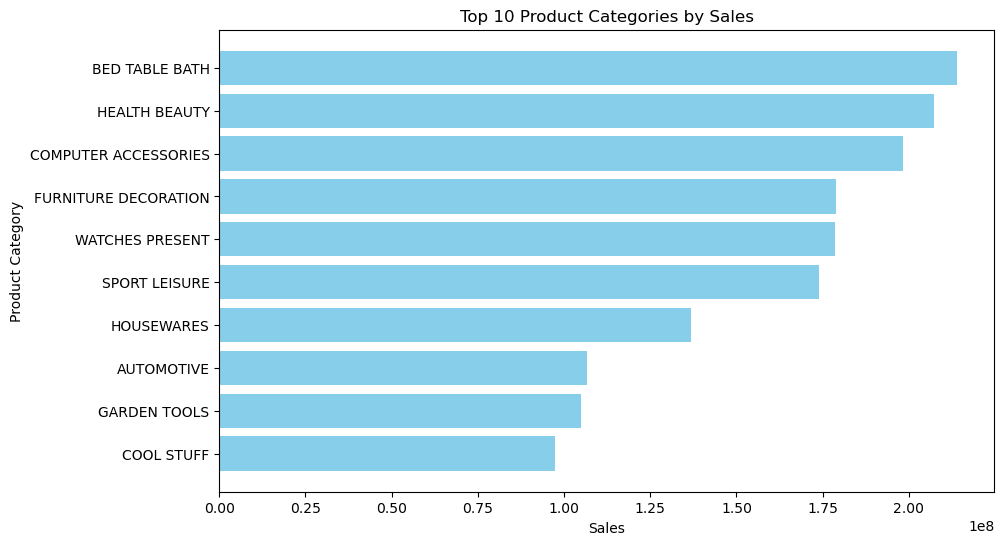

In [7]:
# Sort the DataFrame by sales in descending order and get the top 10 products
top_10_products = df.sort_values(by='sales', ascending=False).head(10)

# Plotting the top 10 products
plt.figure(figsize=(10, 6))
plt.barh(top_10_products['category'], top_10_products['sales'], color='skyblue')
plt.xlabel('Sales')
plt.ylabel('Product Category')
plt.title('Top 10 Product Categories by Sales')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest sales at the top
plt.show()

### Calculate the percentage of orders that were paid in installments.

In [8]:
query = """ SELECT (sum(case when payment_installments >= 1 then 1 else 0 end))/count(*)*100
            FROM payments
            
        """

cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in installments", data[0][0]

('the percentage of orders that were paid in installments', Decimal('99.9981'))

### Count the number of customers from each state.

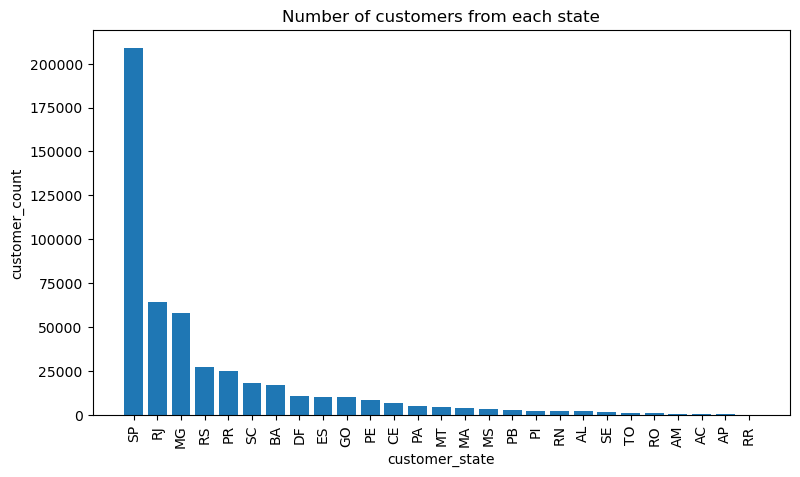

In [9]:
query = """ SELECT customer_state, count(customer_id)
            FROM customers 
            GROUP BY customer_state
            
        """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns =["customer_state", "customer_count"])
df = df.sort_values(by = 'customer_count', ascending = False)

plt.figure(figsize = (9,5))
plt.bar(df["customer_state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.xlabel('customer_state')
plt.ylabel('customer_count')
plt.title('Number of customers from each state')
plt.show()

### Intermediate Queries
1. Calculate the number of orders per month in 2018.
2. Find the average number of products per order, grouped by customer city.
3. Calculate the percentage of total revenue contributed by each product category.
4. Identify the correlation between product price and the number of times a product has been purchased.
5. Calculate the total revenue generated by each seller, and rank them by revenue.

### Calculate the number of orders per month in 2018.

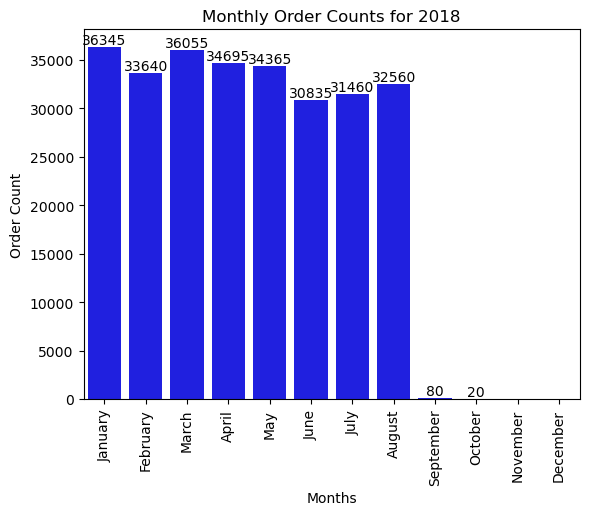

In [10]:
query = """
SELECT monthname(order_purchase_timestamp) months, count(order_id) order_count
FROM orders 
WHERE year(order_purchase_timestamp) = 2018
GROUP BY months
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["months", "order_count"])


month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]


df['months'] = pd.Categorical(df['months'], categories=month_order, ordered=True)


df = df.sort_values('months')


# plt.figure(figsize=(15, 6))
ax = sns.barplot(x="months", y="order_count", data=df, order=month_order, color = "blue")
plt.xlabel('Months')
plt.ylabel('Order Count')
plt.title('Monthly Order Counts for 2018')
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container)

plt.show()

### Find the average number of products per order, grouped by customer city.

In [11]:
query = """
with count_per_order as 
(SELECT orders.order_id, orders.customer_id, count(order_items.order_id) as oc
FROM orders join order_items
on orders.order_id = order_items.order_id
GROUP BY orders.order_id, orders.customer_id)

SELECT customers.customer_city, round(avg(count_per_order.oc),2) average_orders
FROM customers join count_per_order
on customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city 
ORDER BY average_orders desc
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["customer city", "average products/orders"])
df.head(10)

,customer city,average products/orders
0,padre carvalho,175.00
1,celso ramos,162.50
2,datas,150.00
3,candido godoi,150.00
4,matias olimpio,125.00
5,cidelandia,100.00
6,curralinho,100.00
7,picarra,100.00
8,morro de sao paulo,100.00
9,teixeira soares,100.00


### Calculate the percentage of total revenue contributed by each product category.


In [12]:
query = """SELECT upper(products.product_category) category, 
            round((sum(payments.payment_value) / (SELECT sum(payment_value) FROM payments))*100,2) sales_percentage
            FROM products 
            JOIN order_items ON products.product_id = order_items.product_id
            JOIN payments ON payments.order_id = order_items.order_id
            GROUP BY category order by sales_percentage desc;
"""
cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category", "Percentage Distribution"])
df.head(5)


,Category,Percentage Distribution
0,BED TABLE BATH,267.44
1,HEALTH BEAUTY,258.82
2,COMPUTER ACCESSORIES,247.57
3,FURNITURE DECORATION,223.34
4,WATCHES PRESENT,223.19


### Identify the correlation between product price and the number of times a product has been purchased.

In [13]:

query = """ SELECT products.product_category,
            COUNT(order_items.product_id),
            round(avg(order_items.price),2)
            FROM products join order_items
            on products.product_id = order_items.product_id
            GROUP BY products.product_category
"""
cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["category", "order_count","price"])
df

# price and order_count impact check
arr1 = df['order_count']
arr2 =df['price']

a = np.corrcoef([arr1,arr2])
print("The correlation between price and no of times product has been purchased",a[0][-1])

The correlation between price and no of times product has been purchased -0.10631514167157564


### Calculate the total revenue generated by each seller, and rank them by revenue.

In [14]:
query = """ SELECT *, dense_rank() over(order by revenue desc) as rn 
            FROM 
            (SELECT order_items.seller_id, sum(payments.payment_value)
            revenue 
            FROM order_items join payments
            on order_items.order_id = payments.order_id
            GROUP BY order_items.seller_id) as a

"""
cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns =['seller_id', 'revenue','rank'])
df = df.head(5)

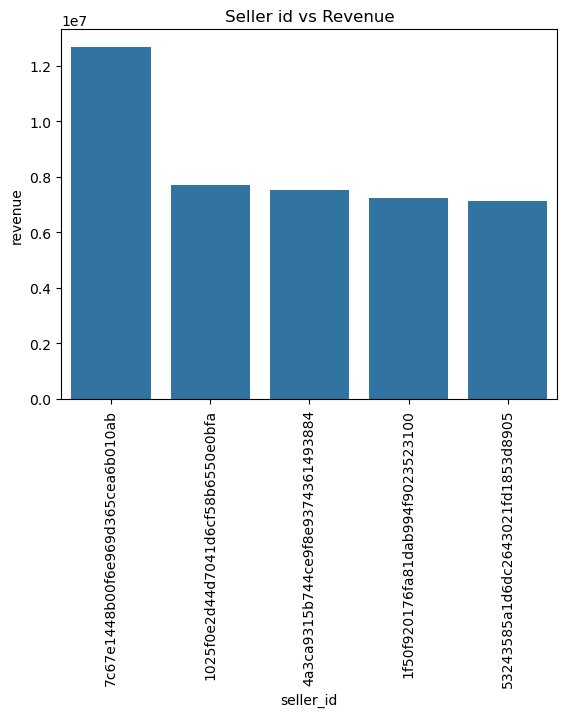

In [15]:
sns.barplot(x ='seller_id', y ='revenue', data =df)
plt.xticks(rotation = 90)
plt.title('Seller id vs Revenue')
plt.show()

### Advanced Queries
1. Calculate the moving average of order values for each customer over their order history.
2. Calculate the cumulative sales per month for each year.
3. Calculate the year-over-year growth rate of total sales.
4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.
5. Identify the top 3 customers who spent the most money in each year.

### 1. Calculate the moving average of order values for each customer over their order history.

In [16]:
# over 3 months moving average

query = """ 
SELECT customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row) as mov_avg
FROM 
(SELECT orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
FROM payments join orders
on payments.order_id = orders.order_id) as a

"""
cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns =['customer_id', 'order_purchase_timestamp','payment','mov_avg'])
df.head(5)



,customer_id,order_purchase_timestamp,payment,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998


### 2. Calculate the cumulative sales per month for each year.

In [17]:
query = """ 
SELECT years, months, payment, sum(payment)
over(order by years, months) cumulative_sales
from
(SELECT year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id = payments.order_id

GROUP BY years, months order by years, months) as a;
"""
cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns =['years', 'months','payment','cumulative_sales'])
df.head()

,years,months,payment,cumulative_sales
0,2016,9,6306.00,6306.00
1,2016,10,1477262.00,1483568.00
2,2016,12,490.50,1484058.50
3,2017,1,3462201.00,4946259.50
4,2017,2,7297700.24,12243959.74


### 3. Calculate the year-over-year growth rate of total sales.

In [18]:
query = """ with a as
(SELECT year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id = payments.order_id

GROUP BY years
order by years)

select years, ((payment - lag(payment, 1) over(order by years)) /
lag(payment, 1) over (order by years)) *100 from a

"""
cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns =['years','yoy % growth'])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703759
2,2018,20.000924


### 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [32]:
query = """ 
with a as
(SELECT customers.customer_id,
min(orders.order_purchase_timestamp) first_order
FROM customers JOIN orders
ON customers.customer_id = orders.customer_id
GROUP BY customers.customer_id)

SELECT a.customer_id, count(distinct orders.order_purchase_timestamp)
from a join orders
on orders.customer_id =a.customer_id
 AND orders.order_purchase_timestamp > first_order AND orders.order_purchase_timestamp < 
 date_add(first_order, interval 6 month)
 
 group by a.customer_id;
"""

cur.execute(query)
data = cur.fetchall()
data

# no output since there is no repeat customers

[]

In [33]:
query = """ 
with a as
(SELECT customers.customer_id,
min(orders.order_purchase_timestamp) first_order
FROM customers JOIN orders
ON customers.customer_id = orders.customer_id
GROUP BY customers.customer_id),

b as (SELECT a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id =a.customer_id
 AND orders.order_purchase_timestamp > first_order AND orders.order_purchase_timestamp < 
 date_add(first_order, interval 6 month)
 
 group by a.customer_id)
 
Select 100 *(count(distinct a.customer_id)/count(distinct b.customer_id)) 
from a left join b

on a.customer_id = b.customer_id;
"""

cur.execute(query)
data = cur.fetchall()
data

# no output since there is no repeat customers

[(None,)]

### 5. Identify the top 3 customers who spent the most money in each year.

In [25]:
query = """ select years, customer_id, payment, d_rank
FROM
(SELECT 
    YEAR(orders.order_purchase_timestamp) AS years, 
    orders.order_id, 
    orders.customer_id, 
    SUM(payments.payment_value) AS payment,
    DENSE_RANK() OVER(PARTITION BY YEAR(orders.order_purchase_timestamp) ORDER BY SUM(payments.payment_value) DESC) AS d_rank
FROM 
    orders 
JOIN 
    payments 
ON 
    payments.order_id = orders.order_id
GROUP BY 
    YEAR(orders.order_purchase_timestamp), 
    orders.order_id, 
    orders.customer_id) as a 
    
    where d_rank <=3;


"""
cur.execute(query)
data = cur.fetchall()


df = pd.DataFrame(data, columns =['years','customer_id','payment','d_rank'])
df

,years,customer_id,payment,d_rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,35588.751221,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,35018.499756,2
2,2016,4a06381959b6670756de02e07b83815f,30694.500732,3
3,2017,1617b1357756262bfa56ab541c47bc16,341602.001953,1
4,2017,c6e2731c5b391845f6800c97401a43a9,173232.751465,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,168166.503906,3
6,2018,ec5b2ba62e574342386871631fafd3fc,181871.997070,1
7,2018,f48d464a0baaea338cb25f816991ab1f,173055.249023,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,120235.998535,3


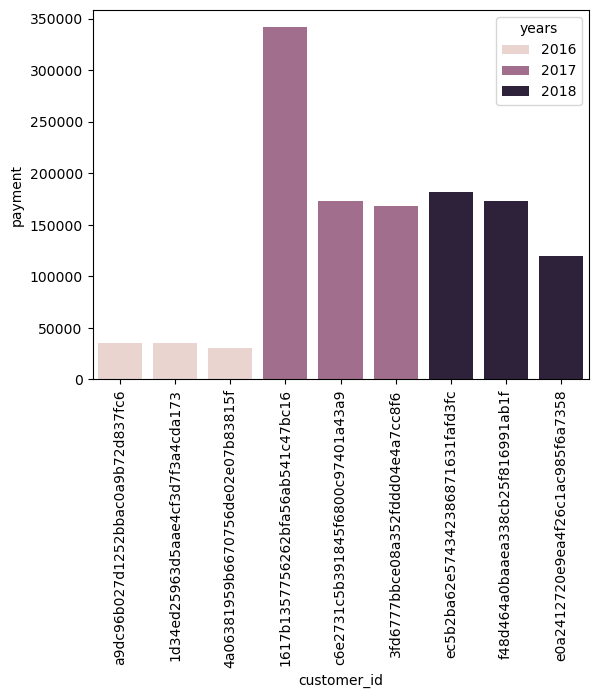

In [29]:
sns.barplot(x ='customer_id', y ='payment', data = df, hue = 'years')
plt.xticks(rotation =90)
plt.show()